In [1]:
# # Glomerulus - GrC connectivity
import numpy as np
import matplotlib.pyplot as plt

In [315]:
fname = "../fig_POPGEN/coords_20190626_1_4.npz"
f = np.load(fname)
f['grc_nop'].shape

(212349, 3)

In [316]:
def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:, i] >= t[0], :]
        mf = mf[mf[:, i] <= t[1], :]
    return mf

In [317]:
def print_range(goc):
    print(
        "Current range:\n",
        "x: [{}, {}]\n".format(goc[:, 0].min(), goc[:, 0].max()),
        "y: [{}, {}]\n".format(goc[:, 1].min(), goc[:, 1].max()),
        "z: [{}, {}]".format(goc[:, 2].min(), goc[:, 2].max()),
    )

In [318]:
def fix_coords(x, bbox):
    y = x - 25
    y = limit_to_box(y, bbox)
    print_range(y)
    return y

In [319]:
bbox = [[0, 700], [0, 700], [0, 200]]
grc = fix_coords(f['grc_nop'], bbox)
glo = fix_coords(f['glo'], bbox)

Current range:
 x: [0.0008549989220831833, 699.986297113957]
 y: [0.006435911091646318, 699.996080630667]
 z: [0.0007185494940316062, 199.99976741257763]
Current range:
 x: [0.0003566497912323996, 699.9434720937548]
 y: [0.03680411733359179, 699.9969905094972]
 z: [0.0011508231361929688, 199.98956118528915]


In [342]:
scale_factor = 1/5.5

In [343]:
src = grx.copy()
tgt = glo.copy()
src[:, 1] *= scale_factor
tgt[:, 1] *= scale_factor

In [344]:
from sklearn.neighbors import NearestNeighbors

In [345]:
nn = NearestNeighbors()
nn.fit(tgt)
# conns = nn.radius_neighbors(src, radius=7, return_distance=False)
# nconns = np.frompyfunc(lambda x: x.size, 1, 1)(conns).astype(int)
# _ = plt.hist(nconns,np.arange(nconns.max()),100)
# print('Mean connection = {}'.format(np.mean(nconns)))
      
conns = nn.kneighbors(src, n_neighbors=4, return_distance=False)

In [346]:
dendvs = np.vstack([glo[conn,:] - grc[i,:] for i, conn in enumerate(conns) if conn.size>1])
dendlens = np.sqrt((dendvs**2).sum(axis=-1))
dendlens

array([10.99275749, 12.46118169, 10.14724923, ..., 16.46701368,
        8.30000052, 28.4160095 ])

16.60390238850449±7.946743327086621


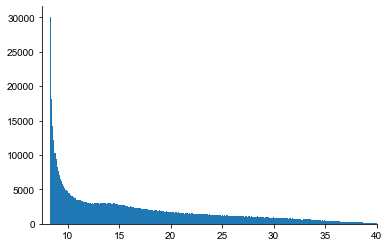

In [347]:
plt.hist(dendlens,500)
plt.xlim([7.5, 40])
print('{}±{}'.format(dendlens.mean(), dendlens.std()))

7.281630819227872±2.327065346940019
40.08056804103227±11.326421144759417


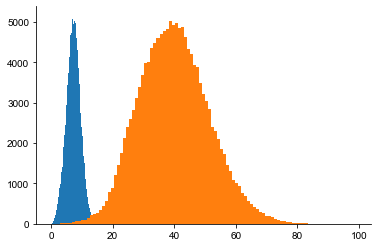

In [348]:
dendvs = [glo[conns[i],:] - grc[i,:] for i, conn in enumerate(conns) if conn.size>1]

ml_spread = np.array([z[:,0].max()-z[:,0].min() for z in dendvs])

plt.hist(ml_spread,100)
print('{}±{}'.format(ml_spread.mean(), ml_spread.std()))

sg_spread = np.array([z[:,1].max()-z[:,1].min() for z in dendvs])

plt.hist(sg_spread,100)
print('{}±{}'.format(sg_spread.mean(), sg_spread.std()))

In [327]:
grx = grc + np.random.randn(*grc.shape)*0.25
nn.fit(grx)
dists, nnids = nn.kneighbors(grx, n_neighbors=2, return_distance=True)

nn.fit(grc)
dists_u, nnids = nn.kneighbors(grc, n_neighbors=2, return_distance=True)

nnids = nnids[:,1]
dists = dists[:,1]

dists_u = dists_u[:,1]

(4, 10)

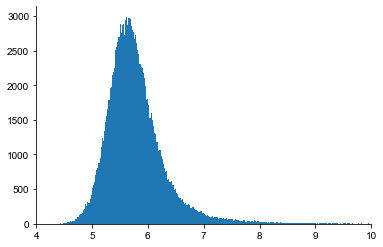

In [300]:
_ = plt.hist(dists, 500)
# _ = plt.hist(dists_u, 500)
plt.xlim([4, 10])

In [353]:
gry = limit_to_box(grx, [[30, 670], [30, 670], [30, 170]])

nn = NearestNeighbors(n_jobs=-1)
nn.fit(grx)

from tqdm.autonotebook import tqdm

mcounts = []
sdcounts = []
dists = np.linspace(0, 30, 120)
for r in tqdm(dists):
    count = np.frompyfunc(lambda x: x.size, 1, 1)(nn.radius_neighbors(
        gry, radius=r, return_distance=False
    )).astype(float) - 1
    mcounts.append(count.mean())
    sdcounts.append(count.std()/np.sqrt(count.size))
# mcount = count.mean()
# sdcount = count.std()
# print('{} ± {}'.format(mcount, sdcount))

cc2 = np.gradient(mcounts)/(dists**2)
cc2_0 = cc2[-1]
cc2 = cc2/cc2_0
plt.plot(dists, cc2)

mcounts = np.array(mcounts)
sdcounts = np.array(sdcounts)

_, ax = plt.
cc2_u = np.gradient(mcounts + 150*sdcounts)/(dists**2+0.001)/cc2_0
cc2_d = np.gradient(mcounts - 150*sdcounts)/(dists**2+0.001)/cc2_0
# plt.fill_between(dists, cc2_d, cc2_u)
plt.fill_between(dists, cc2_d, cc2_u, alpha=0.5)
plt.plot(dists, cc2, 'k')

In [521]:
scale_factor = 1/3
gry = limit_to_box(grx, [[40, 660], [40/scale_factor, 700-40/scale_factor], [0, 200]])
src = gry.copy()
tgt = glo.copy()
src[:, 1] *= scale_factor
tgt[:, 1] *= scale_factor

In [523]:
nn = NearestNeighbors(n_jobs=-1)
nn.fit(tgt)
# conns = nn.radius_neighbors(src, radius=7, return_distance=False)
# nconns = np.frompyfunc(lambda x: x.size, 1, 1)(conns).astype(int)
# _ = plt.hist(nconns,np.arange(nconns.max()),100)
# print('Mean connection = {}'.format(np.mean(nconns)))

mcounts = []
vcounts = []
dists0 = np.linspace(0, 40, 120)
for r in tqdm(dists0):
    count = np.frompyfunc(lambda x: x.size, 1, 1)(nn.radius_neighbors(
        src, radius=r, return_distance=False
    )).astype(float)
    mcounts.append(count.mean())
    vcounts.append(count.var())

In [524]:
mcounts0 = np.array(mcounts)
vcounts0 = np.array(vcounts)

In [659]:
dists0 = np.linspace(0, 40, 120)


ii = (mcounts0>0) * (mcounts0 < 80)
mcounts = mcounts0[ii]
dists = dists0[ii]
vcounts = vcounts0[ii]

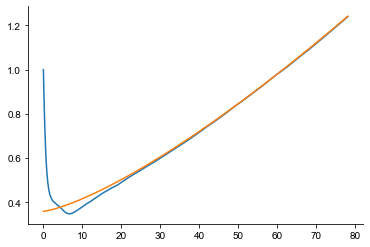

In [705]:
plt.plot(mcounts, (vcounts)/mcounts, mcounts, (mcounts/86)**(4/3)+0.36)
# plt.xlim([0, 20])

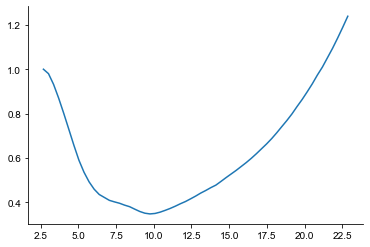

In [706]:
plt.plot(dists, (vcounts)/mcounts)
# plt.xlim([0, 20])

(0, 15)

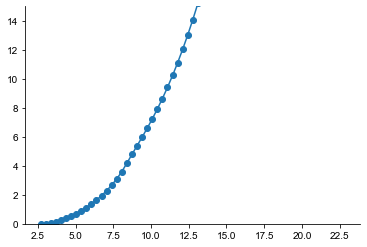

In [712]:
plt.plot(dists, mcounts, 'o-')
plt.ylim([0, 15])

